In [1]:
import pprint as pp
import requests 
import eventregistry
import feedparser as fp
import json
from newsapi import NewsApiClient
from datetime import date
import datetime
import pandas as pd
import newspaper
from newspaper import Article
from time import mktime
from datetime import datetime, timedelta
import nltk
nltk.download('punkt')
nltk.download('stopwords')
from nltk.tokenize.regexp import WhitespaceTokenizer
import numpy as np
import matplotlib.pyplot as plt
import numpy as np
from os import path
from PIL import Image
from wordcloud import WordCloud, STOPWORDS, ImageColorGenerator


[nltk_data] Downloading package punkt to /Users/hsaul/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package stopwords to /Users/hsaul/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [37]:
subscription_key = "b9297b332bmshd145b94c59505f0p1a438cjsn3dc7ab324c32"


In [43]:
url = "https://microsoft-azure-bing-news-search-v1.p.rapidapi.com/"
search_term = "Coronavirus"
headers = {
    'x-rapidapi-host': "microsoft-azure-bing-news-search-v1.p.rapidapi.com",
    'x-rapidapi-key': "b9297b332bmshd145b94c59505f0p1a438cjsn3dc7ab324c32"
    }
params  = {"q": search_term, "textDecorations": True, "textFormat": "HTML"}

response = requests.request("GET", url, headers=headers)
headers = {"Ocp-Apim-Subscription-Key" : subscription_key}
print(response.text)

{"_type": "News", "webSearchUrl": "https:\/\/www.bing.com\/news\/search?q=top+stories&form=TNSA02", "value": [{"name": "JUST IN: 20-year-old among the storm victims identified in North Georgia", "url": "https:\/\/www.ajc.com\/news\/crime--law\/just-year-old-among-the-storm-victims-identified-north-georgia\/PugvxFt4ZuBaPAoruXPPxN\/", "image": {"thumbnail": {"contentUrl": "https:\/\/www.bing.com\/th?id=ON.C16ECE2BA300A1F31A02B6BCE21DF098&pid=News", "width": 700, "height": 321}}, "description": "The names of four people killed in North Georgia by a suspected tornado were released Tuesday. A 20-year-old woman is among the victims, the Murray County coroner said. Among those killed were Rebecca Beck, 59; Laquita Thomas, 63, Deanna Zambrano, 20; and Richard Irwin, 50, according to Coroner Jason Gibson. The Sunday night storms killed seven ...", "about": [{"readLink": "https:\/\/api.cognitive.microsoft.com\/api\/v7\/entities\/16ff3e80-21ff-30c5-e669-01e0b0ba037c", "name": "North Georgia"}], "

In [51]:
from eventregistry import *
er = EventRegistry(apiKey = '33bbd245-d081-4083-aea8-aae044547b59' )
q = QueryArticles(
    dateStart = datetime.date(2020, 4, 1), dateEnd = datetime.date(2020, 4, 14),
    conceptUri = er.getConceptUri("Coronavirus"),
    sourceUri = er.getNewsSourceUri("New York Times"))

# return details about the articles, including the concepts, categories, location and image
q.setRequestedResult(RequestArticlesInfo(count = 50,
    returnInfo = ReturnInfo(
        articleInfo = ArticleInfoFlags(duplicateList = True, concepts = True, categories = True, location = True, image = True))))
# execute the query
res = er.execQuery(q)

using user provided API key for making requests
Event Registry host: http://eventregistry.org
Text analytics host: http://analytics.eventregistry.org


In [52]:
res

{'articles': {'results': [{'uri': '6032239006',
    'lang': 'eng',
    'isDuplicate': False,
    'date': '2020-04-14',
    'time': '20:34:00',
    'dateTime': '2020-04-14T20:34:00Z',
    'dateTimePub': '2020-04-14T20:34:00Z',
    'dataType': 'news',
    'sim': 0,
    'url': 'https://www.nytimes.com/2020/04/14/style/coronaviurs-personal-training-former-inmates-a-second-u.html',
    'title': "Feel Like You're in Prison? These Trainers Actually Were",
    'body': 'The Coronavirus Outbreak\n\nLike a lot of self-isolating people, Madisen Li is vacillating between nervous, bored, grateful and irritable. One of her main forms of relief comes from her weekly training sessions over Zoom with her personal trainer of nine years, Hector Guadalupe.\n\nEarlier this month, amid a circuit of curls and crunches, Mrs. Li, 32, who is the director of footwear merchandising for Kenneth Cole, let off some emotional steam too. "We were working out, and I was complaining to him that my husband and I had been 

In [3]:
newsapi = NewsApiClient(api_key='f513e29c94b844758f79311e9e081927')

all_articles = newsapi.get_everything(q='Coronavirus',
                                      sources= 'breitbart-news',
                                      from_param='2020-03-15',
                                      to= '2020-04-09',
                                      language='en',
                                      sort_by='relevancy',
                                      page_size=50,
                                      page=1)




In [4]:
print(all_articles)

{'status': 'ok', 'totalResults': 2471, 'articles': [{'source': {'id': 'breitbart-news', 'name': 'Breitbart News'}, 'author': 'Simon Kent', 'title': 'Shoot Stray Dogs, Win Cash Prizes: How Chinese Officials Slaughtered Canines...', 'description': 'Shoot Stray Dogs, Win Cash Prizes: How Chinese Officials Slaughtered Canines... (Third column, 4th story, link ) Related stories: Chinese Tycoon Who Criticized Xi Response to Coronavirus Has Vanished...', 'url': 'https://www.breitbart.com/asia/2020/03/16/shoot-stray-dogs-win-cash-prizes-how-chinese-officials-slaughtered-canines/', 'urlToImage': 'https://media.breitbart.com/media/2020/03/dog-pet-640x335.jpg', 'publishedAt': '2020-03-16T14:49:40Z', 'content': 'A southern China community neighbourhood management office offered cash rewards to citizens for slaughtering stray or “unleashed” dogs during the coronavirus epidemic, according to an online news report.\r\nThe gruesome incentive was included in a notice issued… [+2486 chars]'}, {'source':

In [25]:
all_sources = newsapi.get_sources()
print(all_sources)

{'status': 'ok', 'sources': [{'id': 'abc-news', 'name': 'ABC News', 'description': 'Your trusted source for breaking news, analysis, exclusive interviews, headlines, and videos at ABCNews.com.', 'url': 'https://abcnews.go.com', 'category': 'general', 'language': 'en', 'country': 'us'}, {'id': 'abc-news-au', 'name': 'ABC News (AU)', 'description': "Australia's most trusted source of local, national and world news. Comprehensive, independent, in-depth analysis, the latest business, sport, weather and more.", 'url': 'http://www.abc.net.au/news', 'category': 'general', 'language': 'en', 'country': 'au'}, {'id': 'aftenposten', 'name': 'Aftenposten', 'description': 'Norges ledende nettavis med alltid oppdaterte nyheter innenfor innenriks, utenriks, sport og kultur.', 'url': 'https://www.aftenposten.no', 'category': 'general', 'language': 'no', 'country': 'no'}, {'id': 'al-jazeera-english', 'name': 'Al Jazeera English', 'description': 'News, analysis from the Middle East and worldwide, multim

In [19]:
def get_sources(country):
    sources = newsapi.get_sources(country=country)
    sources = [x['id'] for x in sources['sources']]
    return sources

sources= get_sources(country='us')
print(sources[:200])


['abc-news', 'al-jazeera-english', 'ars-technica', 'associated-press', 'axios', 'bleacher-report', 'bloomberg', 'breitbart-news', 'business-insider', 'buzzfeed', 'cbs-news', 'cnbc', 'cnn', 'cnn-es', 'crypto-coins-news', 'engadget', 'entertainment-weekly', 'espn', 'espn-cric-info', 'fortune', 'fox-news', 'fox-sports', 'google-news', 'hacker-news', 'ign', 'mashable', 'medical-news-today', 'msnbc', 'mtv-news', 'national-geographic', 'national-review', 'nbc-news', 'new-scientist', 'newsweek', 'new-york-magazine', 'next-big-future', 'nfl-news', 'nhl-news', 'politico', 'polygon', 'recode', 'reddit-r-all', 'reuters', 'techcrunch', 'techradar', 'the-american-conservative', 'the-hill', 'the-huffington-post', 'the-next-web', 'the-verge', 'the-wall-street-journal', 'the-washington-post', 'the-washington-times', 'time', 'usa-today', 'vice-news', 'wired']


In [5]:
data_abc= pd.DataFrame(all_articles['articles'])
data_abc

,source,author,title,description,url,urlToImage,publishedAt,content
0,"{'id': 'breitbart-news', 'name': 'Breitbart Ne...",Simon Kent,"Shoot Stray Dogs, Win Cash Prizes: How Chinese...","Shoot Stray Dogs, Win Cash Prizes: How Chinese...",https://www.breitbart.com/asia/2020/03/16/shoo...,https://media.breitbart.com/media/2020/03/dog-...,2020-03-16T14:49:40Z,A southern China community neighbourhood manag...
1,"{'id': 'breitbart-news', 'name': 'Breitbart Ne...",Frances Martel,Report: Wuhan Funeral Homes Burn Victims Alive...,Report: Wuhan Funeral Homes Burn Victims Alive...,https://www.breitbart.com/asia/2020/04/07/repo...,https://media.breitbart.com/media/2020/04/AP_2...,2020-04-07T16:49:37Z,"Locals in Wuhan, where the Chinese coronavirus..."
2,"{'id': 'breitbart-news', 'name': 'Breitbart Ne...",Bob Price,80% of residents in TX nursing home infected...,80% of residents in TX nursing home infected.....,https://www.breitbart.com/border/2020/04/02/co...,https://media.breitbart.com/media/2020/04/AP_2...,2020-04-03T16:55:37Z,"San Antonio, Texas, officials report that 66 o..."
3,"{'id': 'breitbart-news', 'name': 'Breitbart Ne...",Gabrielle Reyes,Beijing Boasts of 'Roaring' Economy...,Beijing Boasts of 'Roaring' Economy... (Second...,https://www.breitbart.com/asia/2020/03/31/chin...,https://media.breitbart.com/media/2020/03/Gett...,2020-04-01T01:55:38Z,"In Sihanoukville, a Chinese-funded gambling en..."
4,"{'id': 'breitbart-news', 'name': 'Breitbart Ne...",Breitbart News,How to Get Small Business Coronavirus Loans - ...,How to Get Small Business Coronavirus Loans Br...,https://www.breitbart.com/news/how-to-get-smal...,https://media.breitbart.com/media/2020/01/Stev...,2020-04-02T22:19:00Z,NEW YORK (AP) Millions of small business owner...
5,"{'id': 'breitbart-news', 'name': 'Breitbart Ne...","Charlie Spiering, Charlie Spiering",White House Coronavirus Task Force Details Dat...,Coronavirus Response Coordinator Dr. Deborah B...,https://www.breitbart.com/politics/2020/03/31/...,https://media.breitbart.com/media/2020/03/wi/a...,2020-03-31T23:13:41Z,White House Coronavirus Response Coordinator D...
6,"{'id': 'breitbart-news', 'name': 'Breitbart Ne...","Sean Moran, Sean Moran",Watch Live: House Debates $2 Trillion Coronavi...,The House will consider the Senate-passed coro...,https://www.breitbart.com/politics/2020/03/27/...,https://media.breitbart.com/media/2018/08/Floo...,2020-03-27T13:27:36Z,The House will consider the Senate-passed coro...
7,"{'id': 'breitbart-news', 'name': 'Breitbart Ne...","Sean Moran, Sean Moran",Watch Live: Senate Debates Coronavirus Relief ...,The Senate will continue to debate the biparti...,https://www.breitbart.com/politics/2020/03/23/...,https://media.breitbart.com/media/2020/03/AP_2...,2020-03-23T17:05:21Z,The Senate will continue to debate the biparti...
8,"{'id': 'breitbart-news', 'name': 'Breitbart Ne...",Hannah Bleau,BERNIE: Wisconsin Election 'May Very Well Prov...,BERNIE: Wisconsin Election 'May Very Well Prov...,https://www.breitbart.com/politics/2020/04/07/...,https://media.breitbart.com/media/2020/02/Gett...,2020-04-07T16:49:39Z,Sen. Bernie Sanders (I-VT) on Tuesday expresse...
9,"{'id': 'breitbart-news', 'name': 'Breitbart Ne...","Hannah Bleau, Hannah Bleau",Bernie Sanders Follows President Trump Calling...,Sen. Bernie Sanders (I-VT) on Tuesday called f...,https://www.breitbart.com/politics/2020/03/17/...,https://media.breitbart.com/media/2020/03/wi/a...,2020-03-18T02:13:14Z,Sen. Bernie Sanders (I-VT) on Tuesday called f...


In [30]:
abc_list=  all_articles['articles']
key_words_100=[]
for abc_articles in all_articles['articles']:
    
    try:
        art = Article(url=abc_articles['url'])
        
    except Article: 
        continue
    art.download()
    art.parse()
    art.nlp()
    key_words_100.append(art.keywords)


In [6]:
urls=[]
for abc_articles in all_articles['articles']:
    url=abc_articles['url']
    urls.append(url)


In [7]:
urls[0]

'https://www.breitbart.com/asia/2020/03/16/shoot-stray-dogs-win-cash-prizes-how-chinese-officials-slaughtered-canines/'

In [78]:
art = Article(url=urls[0])
art.download()
art.parse()
art.text

'A southern China community neighbourhood management office offered cash rewards to citizens for slaughtering “stray” or “unleashed” dogs during the coronavirus epidemic, according to an online news report.\n\nThe gruesome incentive was included in a notice issued to residents of the Wanjiang Community in Dongguan, Guangdong province, in response to complaints about irresponsible dog owners, Kankanews.com reported.\n\nWhile the document dealt mostly with issues such as the need for owners to have a licence for their pets and to show consideration for other residents by keeping their animals on a lead in public areas and cleaning up after them, it also included a warning.\n\nThat stated any dog seen within the grounds of the compound and not on a lead would be classed as a stray. And anyone who killed a stray was entitled to claim a reward of 200 yuan (U.S.$28) – once the death had been verified by a security guard.\n\nAccording to the South China Morning Post, the response to the propo

In [14]:
import socialshares
socialshares.fetch('https://www.breitbart.com/asia/2020/03/16/shoot-stray-dogs-win-cash-prizes-how-chinese-officials-slaughtered-canines', ['facebook', 'pinterest'])

{}

{}

In [33]:
key_words_100
flat_list = [item for sublist in key_words_100 for item in sublist]

In [34]:
key_words_100

[['pets',
  'canines',
  'shoot',
  'cash',
  'notice',
  'coronavirus',
  'stated',
  'animals',
  'officials',
  'community',
  'prizes',
  'win',
  'wanjiang',
  'dogs',
  'stray',
  'wanted',
  'slaughter',
  'chinese'],
 ['report',
  'remains',
  'victims',
  'homes',
  'woman',
  'body',
  'funeral',
  'alive',
  'burned',
  'video',
  'coronavirus',
  'wuhan',
  'patients',
  'chinese'],
 ['texas',
  '84',
  'coronavirus',
  'reported',
  '66',
  'covid19',
  'antonio',
  'tested',
  'officials',
  'strikes',
  'nursing',
  'san',
  'virus',
  'residents'],
 ['china',
  'recent',
  'sihanoukville',
  'casinos',
  'bri',
  'sihanoukvilles',
  'port',
  'coronavirus',
  'cambodian',
  'gold',
  'urinals',
  'installing',
  'recently',
  'casino',
  'chinese'],
 ['program',
  'sba',
  'protection',
  'coronavirus',
  'loans',
  'money',
  'owners',
  'loan',
  'small',
  'help',
  'business'],
 ['birx',
  '100000240000',
  'details',
  'data',
  'coronavirus',
  'number',
  'predic

In [35]:
STOPWORDS.add('coronavirus ')
STOPWORDS.add(' coronavirus')
STOPWORDS.add('corona')
STOPWORDS.add('Coronavirus')
STOPWORDS.add(' Coronavirus')
STOPWORDS.add('Coronavirus')
STOPWORDS.add(' Coronavirus ')
STOPWORDS.add(' coronavirus ')
STOPWORDS.add('Corona')
STOPWORDS.add('covid19')
STOPWORDS.add('COVID19')
STOPWORDS.add('virus')


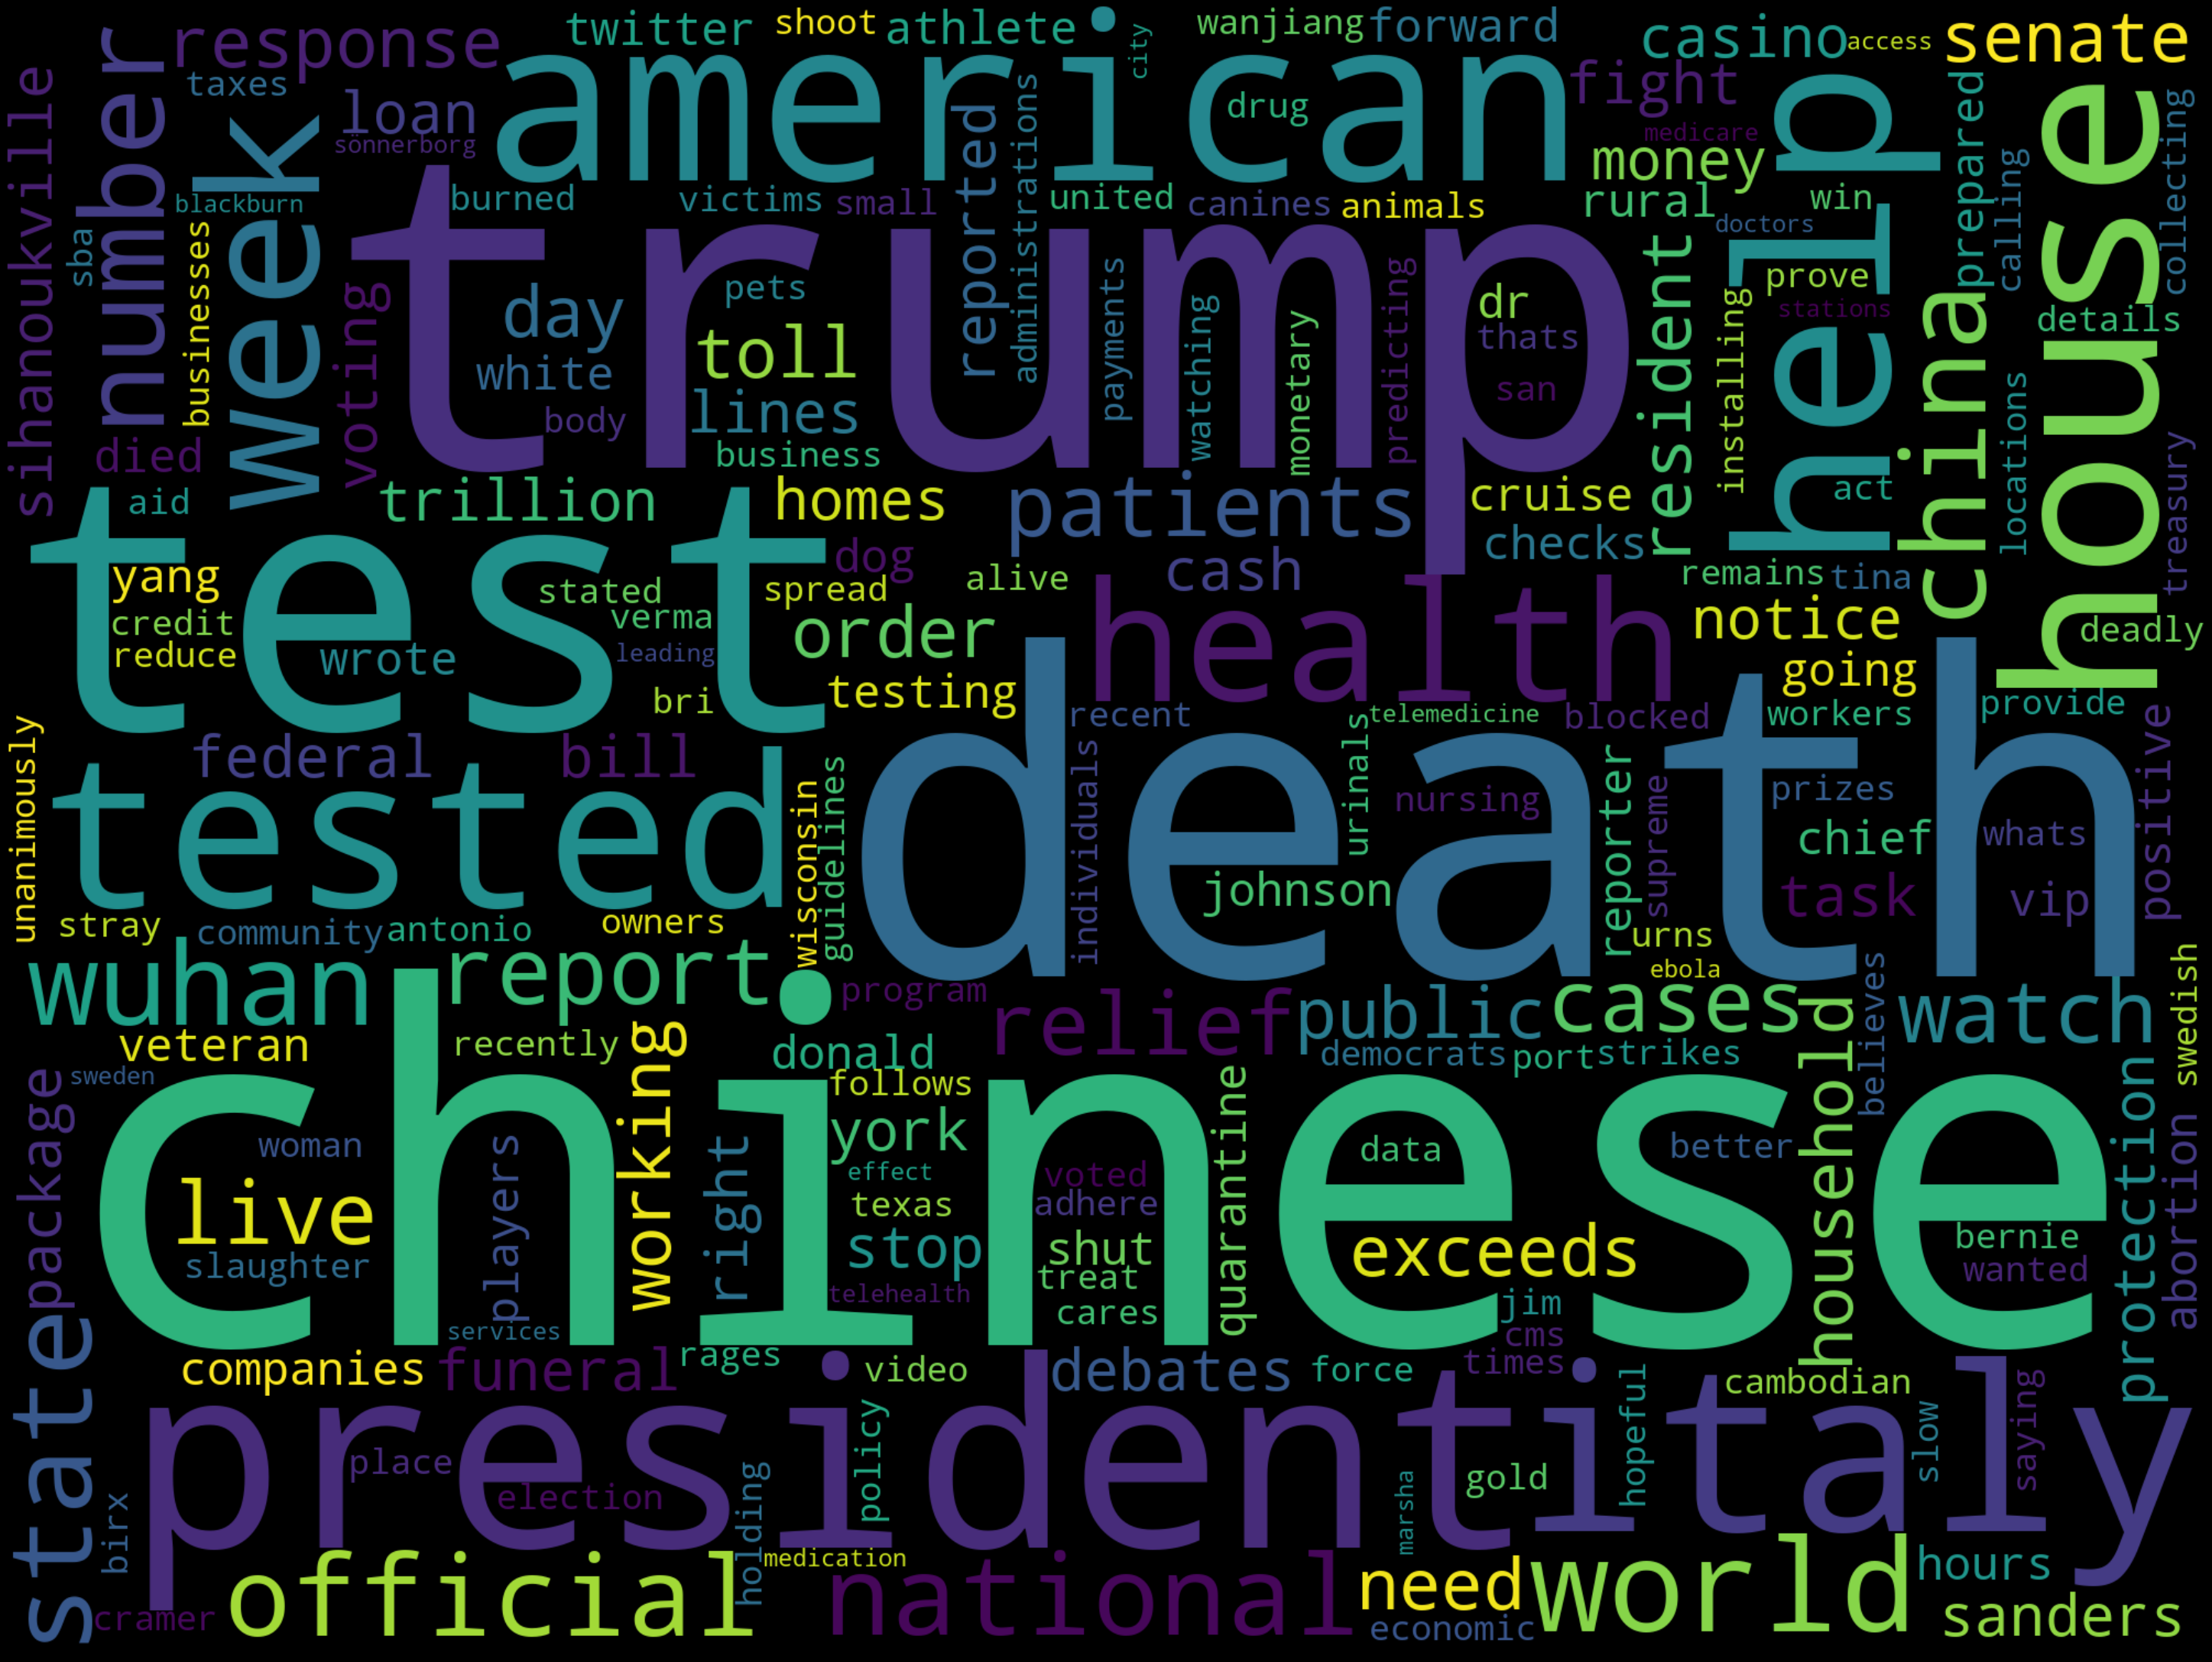

In [36]:
text = " ".join(flat_list)
wordcloud = WordCloud(
    width = 2000,
    height = 1500,
    background_color = 'black',
    stopwords = STOPWORDS).generate(text)
fig = plt.figure(
    figsize = (40, 30),
    facecolor = 'k',
    edgecolor = 'k')
plt.imshow(wordcloud, interpolation = 'bilinear')
plt.axis('off')
plt.tight_layout(pad=0)
plt.show()

In [ ]:
def textblob_sentiment(title,description):
    blob = TextBlob(str(title)+" "+str(description))
    return blob.sentiment.polarity

In [ ]:
create_mask():
    mask = np.array(Image.open("coronavirus.png"))
    im_gray = cv2.cvtColor(mask, cv2.COLOR_BGR2GRAY)
    _, mask = cv2.threshold(im_gray, thresh=20, maxval=255, type=cv2.THRESH_BINARY)
    mask = 255 - mask
    return maskmask = create_mask()def create_wc_by(source):
    data = fulldf[fulldf['source']==source]
    text = " ".join([x for x in data.content.values if x is not None])
    stopwords = set(STOPWORDS)
    stopwords.add('chars')
    stopwords.add('coronavirus')
    stopwords.add('corona')
    stopwords.add('covid-19')
    stopwords.add('chars')
    wc = WordCloud(background_color="white", max_words=1000, mask=mask, stopwords=stopwords,
               max_font_size=90, random_state=42, contour_width=3, contour_color='steelblue')
    wc.generate(text)
    plt.figure(figsize=[30,30])
    plt.imshow(wc, interpolation='bilinear')
    plt.axis("off")
    return pltst.pyplot(create_wc_by(source),use_container_width=True)

KeyError: 1

In [12]:
text_100=[]
for abc_articles in all_articles['articles']:
    
    

In [65]:
abc1=all_articles['articles'][10]
art = Article(url=abc1['url'])
art.download()
print(art.text)

In [67]:
art.text

''

In [16]:
from textblob import TextBlob
newsfeel = TextBlob(str(text_100))

In [17]:
newsfeel.sentiment

Sentiment(polarity=0.036138277940697267, subjectivity=0.4337150197472782)

In [18]:
newsfeel.sentiment.polarity

0.036138277940697267